**CS596 - Machine Learning**
<br>
Date: **2 December 2020**


Title: **Seminar 11**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

In [19]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1 align="center">Dimension reduction using PCA</h1>

<h3 align="center">PCA Steps</h3>

- The below steps need to be followed to perform dimensionality reduction using PCA:

  1. Standardization of the data set;

  2. Calculation of the covariance matrix;

  3. Calculation of the singular values and singular vectors and factorization of the covariance matrix;

  4. Calculation of the number $k$ of Principal Components corresponding to a certain proportion of total variance $\epsilon$ 

  5. Reduction of the data set size;

  6. Data reconstruction from a reduced data set;


- Let's for each step create an appropriate $method$.

In [20]:
import numpy as np
from numpy.linalg import svd
from scipy.io import loadmat
import matplotlib.pyplot as plt

<h3 align="center">Defining Methods</h3>

In [21]:
# Method for step 1: Standardization of the data
# Input:  matrix X
# Output: normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.

def standardization(X):

    # calculates mean value and standard deviation
    mu = np.mean(X, axis=0)     #axes along which the means are computed
    sigma = np.std(X, axis=0)   #axes along which the means are computed
    
    # normalize each element of the matrix so that they are normally distributed with N(0,1) (mu=0, sigma=1)
    X_norm = (X - mu) / sigma
    
    return X_norm

In [22]:
# Method for step 1: Calculation of the covariance matrix
# Input:  matrix X
# Output: covariance matrix of matrix X

def covariance(X):
    
    m = X.shape[0]               # n - number of vectors
    CovX = 1/(m - 1) * X.T @ X
    
    return CovX

In [23]:
# Method for step 3: Calculation of the singular values and singular vectors and factorization of the covariance matrix
# Input:  matrix X
# Output: Singular Value Decomposition of matrix X

def factorization(X):

    U,S,V = svd(X)
  
    return U,S,V

In [24]:
# Method for step 4: Calculation of the number of Principal Components corresponding to a certain proportion of total variance

# Input:  diagonal matrix of singular variables S, number of first columns k 
# Output: proportion of total variance
def epsilon(S, k):

    m = S.shape[0]               # m - number of elements in S
    
    eps1 = 0
    eps2 = 0
    for i in range(m):
        if (i<k): eps1 += S[i]
        eps2 += S[i]
    
    return eps1/eps2

# Input:  diagonal matrix of singular variables S, threshold for the proportion of total variance
# Output: optimal value of the number of Prinipal Components
def optimal_epsilon(S, eps):
    k = 1
    while epsilon(S, k) < eps:
        k += 1
    return k

In [25]:
# Method for step 5: Reduction of the data set size;
# Input:  matrix X, U, k
# Output: the reduced data set representation 

def reduction(X, U, k):

    m = X.shape[0]               # m - number of vectors
    U_reduced = U[:,:k]
    Z = np.zeros((m,k))
    
    for i in range(m):
        for j in range(k):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [26]:
# Method for step 6: Data reconstruction from a reduced data set
# Input:  matrix Z, U, k
# Output: reconstructed matrix X

def reconstruction(Z, U, k):

    m,n = Z.shape[0],U.shape[0] # m - number of vectors in Z, # n - number of vectors in U
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:k]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

<h3 align="center">Main</h3>

- Let's move no the main part of the code and let's load images and display them.


- $5000$ **images in total** and each image has **size $32 \times 32$** ($1024$ **features**).

In [27]:
# load images
mat = loadmat("data/ex7faces.mat")
X = mat["X"]
X.shape

(5000, 1024)

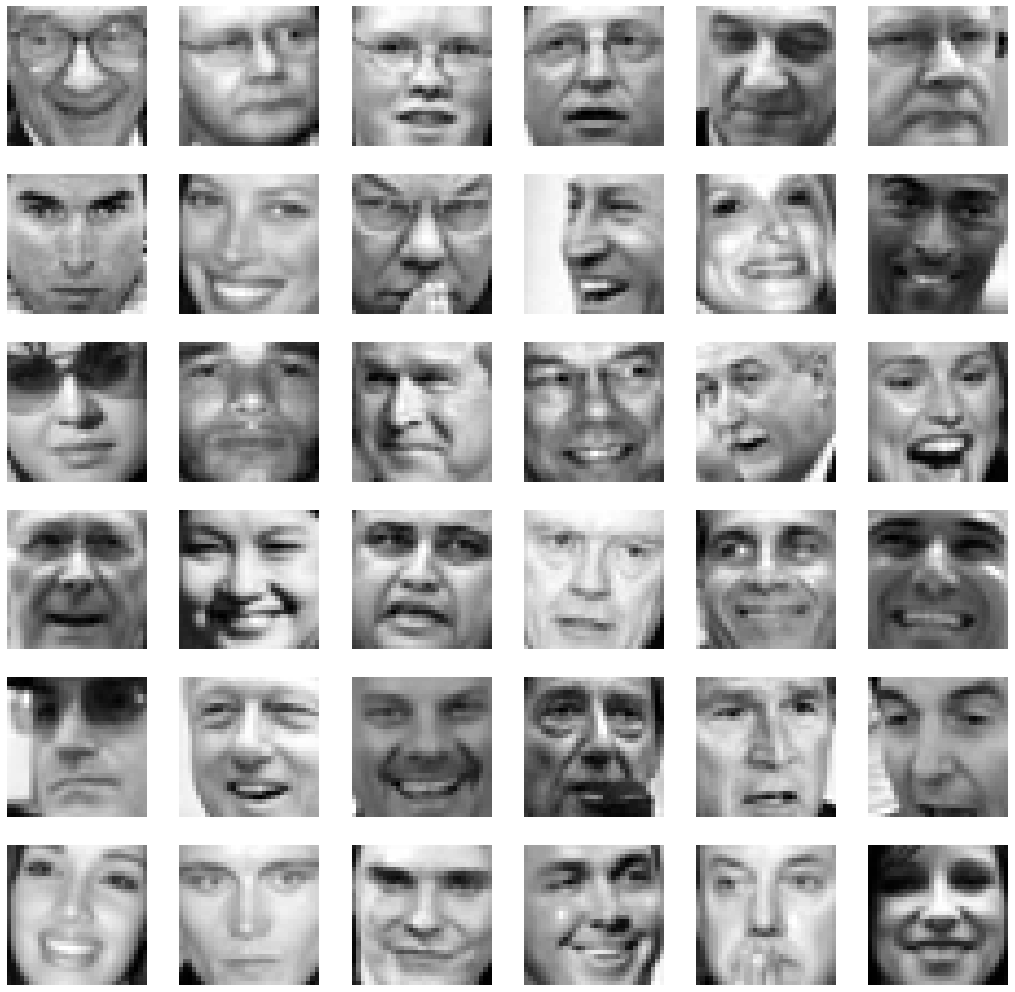

In [28]:
# to show multiple images we need to create subplots

nrows  = 6   # define the number of rows
ncols  = 6   # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig, ax = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = X[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax[int(i/ncols),j].axis("off")                        # tur off axis for better visibility

In [29]:
# do the data standardization of matrix X

X_norm = standardization(X)
X.shape

(5000, 1024)

In [30]:
# compute the covariance matrix from X_norm

CovX = covariance(X_norm)
CovX.shape

(1024, 1024)

In [31]:
# perform Singular Value Decomposition of matrix CovX

U, S, V = factorization(CovX)
U.shape, S.shape, V.shape

# note: S is known as singular values vector which in fact is a representation of diagonal matrix

((1024, 1024), (1024,), (1024, 1024))

<BarContainer object of 1024 artists>

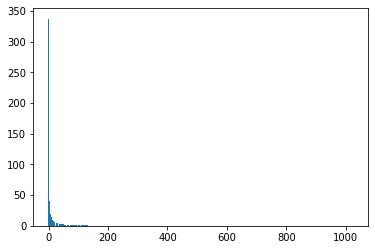

In [32]:
# show full range of singular values

plt.bar(range(S.shape[0]), S)

<BarContainer object of 50 artists>

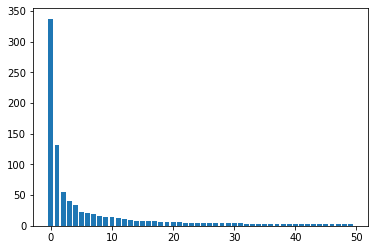

In [33]:
# show the first 100 singular values

plt.bar(range(50), S[:50])

In [40]:
# select the number of principal components corresponding to a proportion of total variance of 90%

k = optimal_epsilon(S, 0.9)
k

69

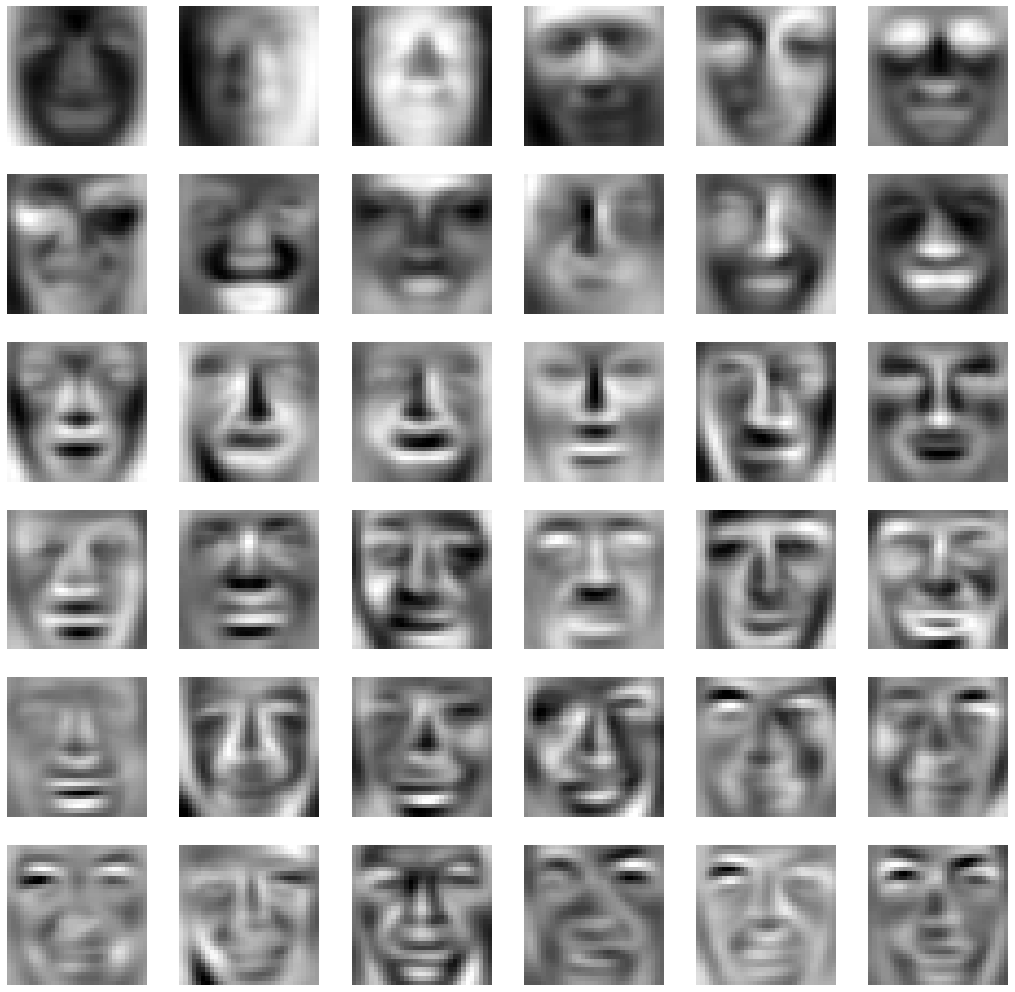

In [41]:
# visualize the images with reduced number of features

U_reduced = U[:,0:k].T

nrows  = 6   # define the number of rows
ncols  = 6   # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig2, ax2 = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = U_reduced[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax2[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax2[int(i/ncols),j].axis("off")   

In [42]:
# reduce the data set using only first k principal components

Z = reduction(X_norm, U, k)
Z.shape

(5000, 69)

In [43]:
# reconstruct the data from the a reduced dataset

X_rec  = reconstruction(Z, U, k)
X_rec.shape

(5000, 1024)

### Visualize the reconstructed data

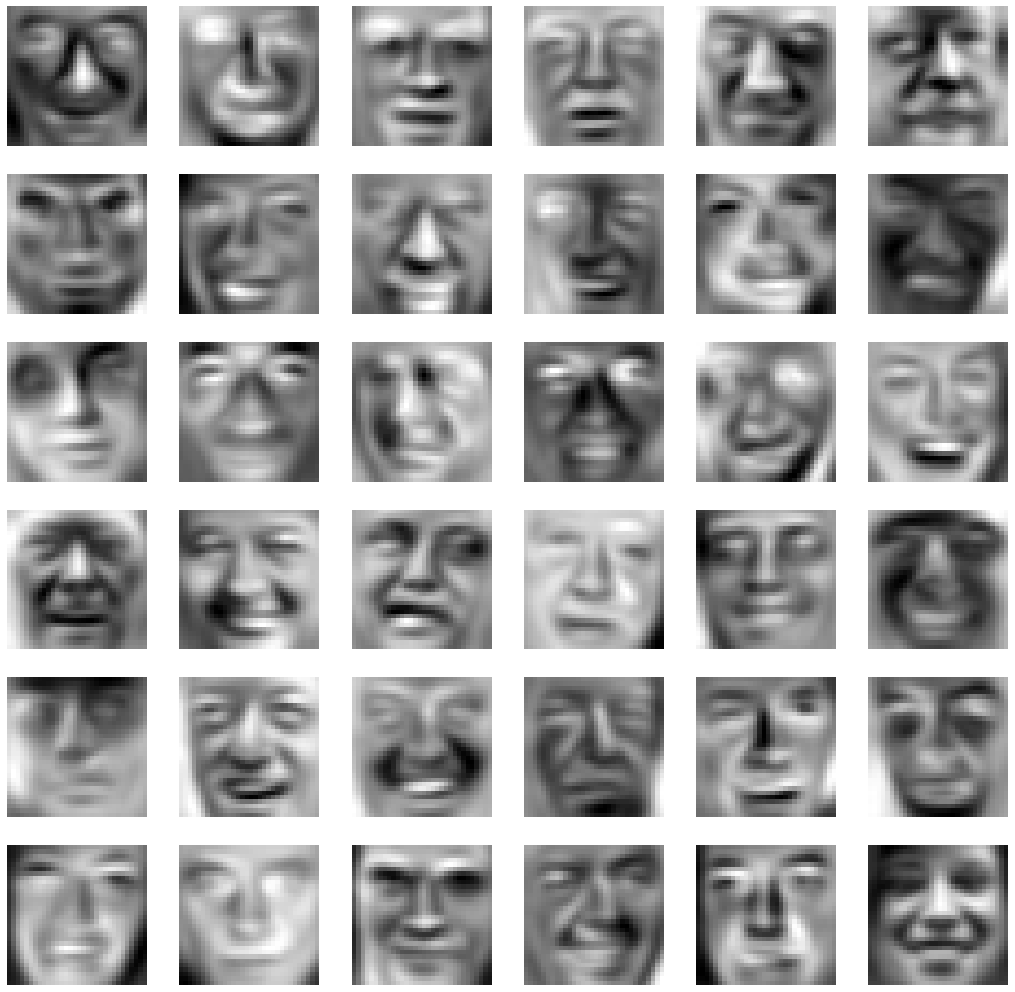

In [44]:
# visualize the reconstructed images

nrows  = 6   # define the number of rows
ncols  = 6   # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig3, ax3 = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = X_rec[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax3[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax3[int(i/ncols),j].axis("off")   

<h1 align="center">High-Dimensional Data Visualizing with t-SNE</h1>

<h3 align="center">MNIST Dataset</h3>

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
train = pd.read_csv('data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.shape

(42000, 785)

In [34]:
train.isnull().any().sum()

0

In [35]:
label = train["label"]
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [36]:
train = train.drop(labels = ["label"],axis = 1)

In [37]:
train = StandardScaler().fit_transform(train)

In [47]:
sample_size = 5000

X_train = train[:sample_size]
y_train = label[:sample_size]

In [48]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(X_train)

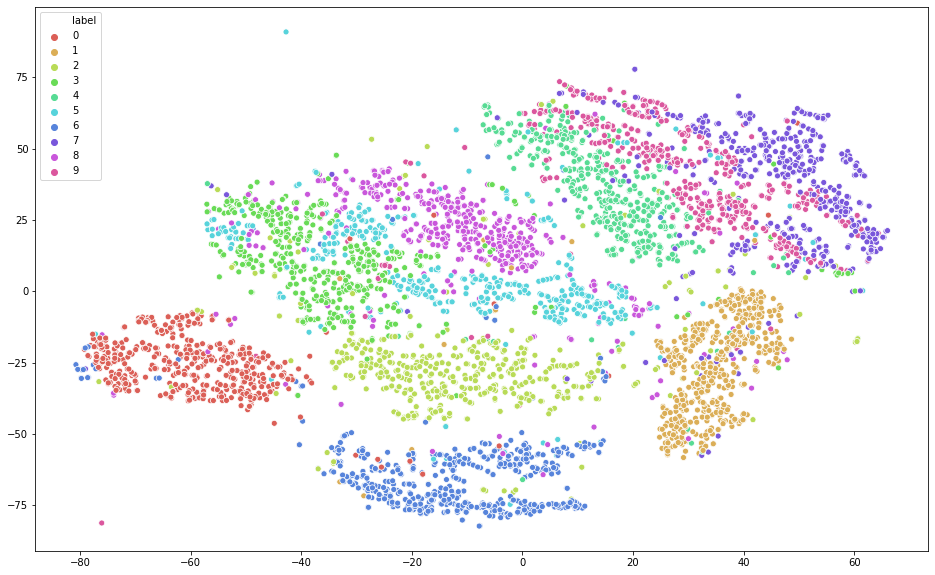

In [49]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y_train, palette = sns.hls_palette(10), legend = 'full');

<h3 align="center">XOR Problem</h3>

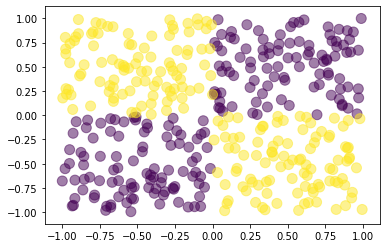

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def get_xor_data():

    X1 = np.random.random((100, 2))
    X2 = np.random.random((100, 2)) - np.array([1, 1])
    X3 = np.random.random((100, 2)) - np.array([1, 0])
    X4 = np.random.random((100, 2)) - np.array([0, 1])
    X = np.vstack((X1, X2, X3, X4))
    Y = np.array([0]*200 + [1]*200)
    return X, Y

X, Y = get_xor_data()
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

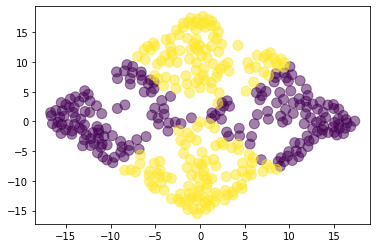

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)

plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

- To better understand how hypermaters for t-SNE work, we can try the following link: https://distill.pub/2016/misread-tsne/#citation

<h1 align="center">End of Seminar</h1>